In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zaurasgarli","key":"dbf92ee97193244da3fc66a2d2861ca6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nomihsa965/hand-detection-dataset-vocyolo-format

Dataset URL: https://www.kaggle.com/datasets/nomihsa965/hand-detection-dataset-vocyolo-format
License(s): Attribution-NonCommercial-ShareAlike 3.0 IGO (CC BY-NC-SA 3.0 IGO)


In [ ]:
import zipfile

with zipfile.ZipFile("/content/hand-detection-dataset-vocyolo-format.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/custom_data")

In [ ]:
import shutil
import os

# Define this function BEFORE using it
def remove_dir(path):
    if os.path.exists(path):
        shutil.rmtree(path)  # also switched to shutil.rmtree (you had it already in comment)

# Move test labels
label_src = '/content/custom_data/test/labels/YOLO'
label_dest = '/content/custom_data/test/labels'
for file in os.listdir(label_src):
    if file.endswith('.txt'):
        shutil.move(os.path.join(label_src, file), os.path.join(label_dest, file))

# Move train labels
label_src1 = '/content/custom_data/train/labels/YOLO'
label_dest1 = '/content/custom_data/train/labels'
for file in os.listdir(label_src1):
    if file.endswith('.txt'):
        shutil.move(os.path.join(label_src1, file), os.path.join(label_dest1, file))

# Now remove unused folders
yo_dir = '/content/custom_data/test/labels/YOLO'
vo_dir = '/content/custom_data/test/labels/VOC'
yo_dir1 = '/content/custom_data/train/labels/YOLO'
vo_dir1 = '/content/custom_data/train/labels/VOC'

remove_dir(yo_dir)
remove_dir(vo_dir)
remove_dir(yo_dir1)
remove_dir(vo_dir1)


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/custom_data',
      'train': 'train/images',
      'val': 'test/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/custom_data
train: train/images
val: test/images
nc: 1
names:
- hand


In [ ]:
!yolo detect train model=yolo11s.pt data=/content/data.yaml epochs=60 imgsz=640

100% 18.4M/18.4M [00:00<00:00, 449MB/s]
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [ ]:
!yolo detect predict model=runs/detect/train2/weights/best.pt source=custom_data/test/images save=True

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/510 /content/custom_data/test/images/VOC2007_101.jpg: 480x640 1 hand, 77.3ms
image 2/510 /content/custom_data/test/images/VOC2007_104.jpg: 640x480 (no detections), 54.8ms
image 3/510 /content/custom_data/test/images/VOC2007_105.jpg: 448x640 1 hand, 49.6ms
image 4/510 /content/custom_data/test/images/VOC2007_109.jpg: 480x640 1 hand, 13.1ms
image 5/510 /content/custom_data/test/images/VOC2007_111.jpg: 448x640 1 hand, 12.7ms
image 6/510 /content/custom_data/test/images/VOC2007_113.jpg: 480x640 2 hands, 13.0ms
image 7/510 /content/custom_data/test/images/VOC2007_115.jpg: 480x640 2 hands, 12.4ms
image 8/510 /content/custom_data/test/images/VOC2007_116.jpg: 480x640 5 hands, 12.4ms
image 9/510 /content/custom_data/test/images/VOC2007_118.jpg: 448x640 1 hand, 12.9ms
image 10/510 /content/custom_data/test/images/VOC2007_1

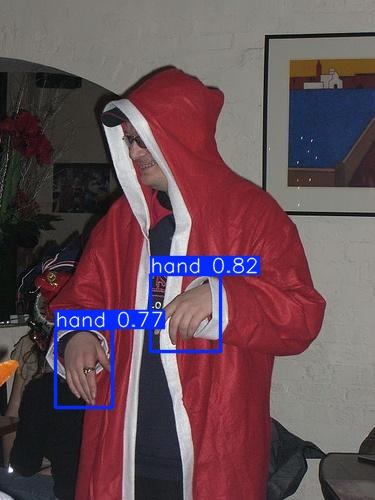

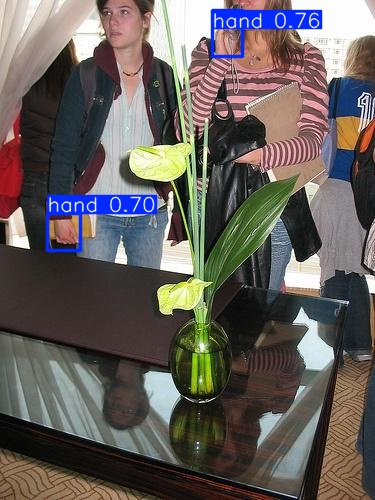

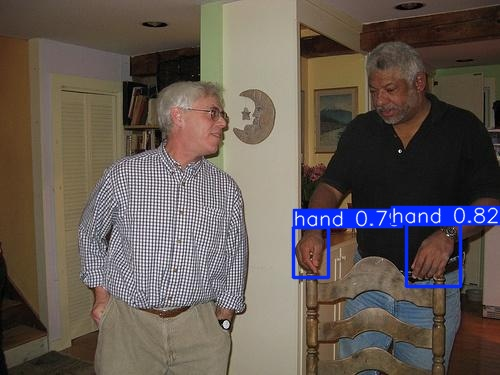

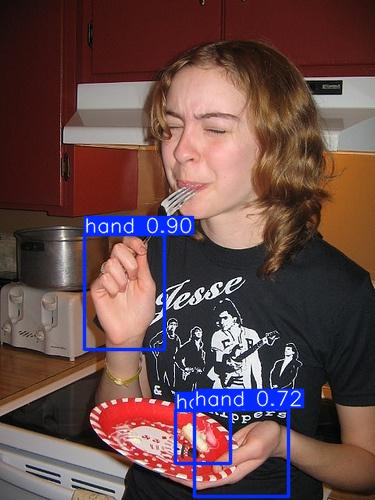

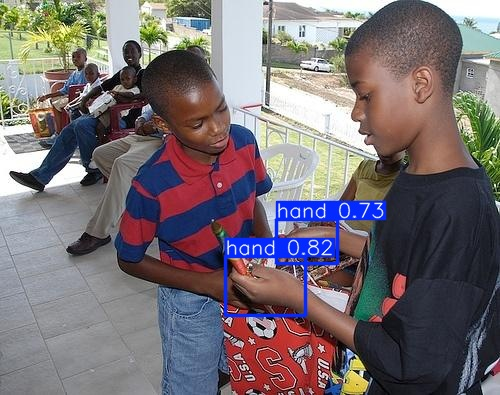

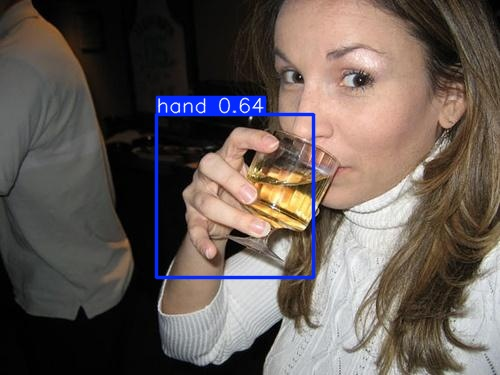

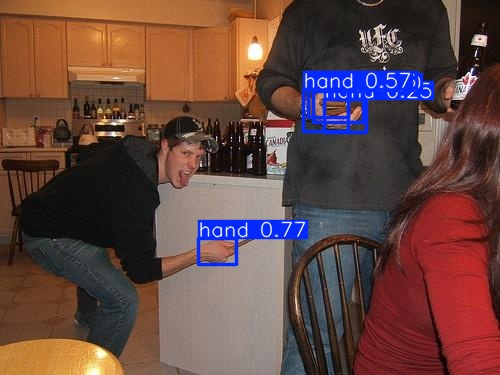

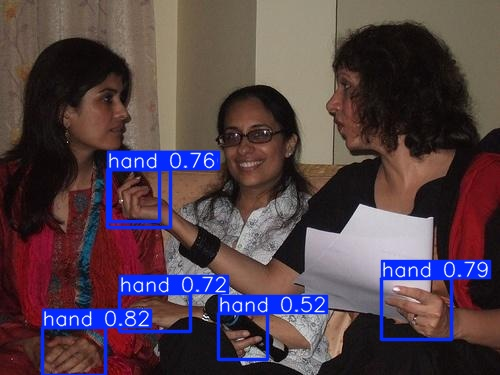

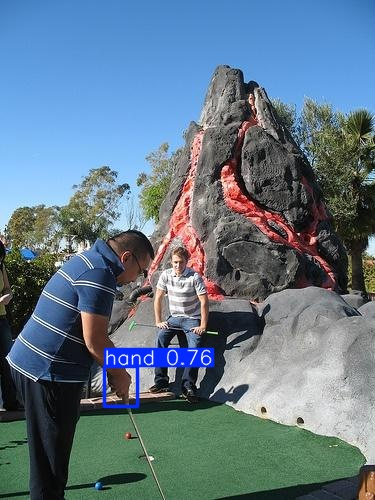

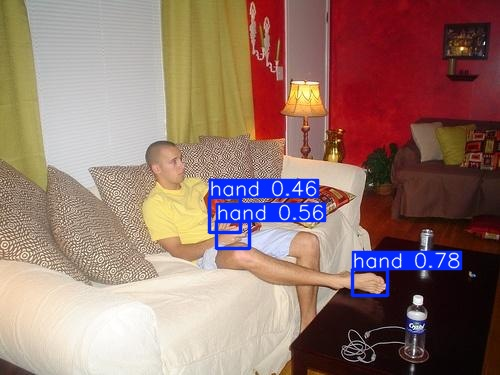

In [ ]:
import glob
from IPython.display import Image, display
for imaage_path in glob.glob('/content/runs/detect/predict/*.jpg')[:10]:
    display(Image(filename=imaage_path, height=400))
    print('\n')

In [ ]:
!cp runs/detect/train2/weights/best.pt /content/best_hand_sign.pt

In [ ]:
from google.colab import files
files.download('/content/best_hand_sign.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>